Linear Regression

I want to know how many **hs_day** of bike rides are made in: a type of day (WEND, LPH, LNPH) with an average temp. (tavg feature) given. Then add a second feature (bike_rides_day) to improve the model

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

%matplotlib notebook

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive

Mounted at /gdrive
/gdrive/MyDrive


In [3]:
br_data = pd.read_csv('./br2018_resume.csv')
br_data

,duration_sum,duration_count,type_day,hs_day,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,mean_hs_dayType
0,61 days 15:15:00.999999910,2079,WEND,1479.250000,22.2,17.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.711520
1,46 days 04:03:17.999999935,2492,LNPH,1108.054722,25.4,18.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444645
2,29 days 00:02:28.999999954,1585,LPH,696.041111,25.4,18.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.439143
3,55 days 07:18:23.999999937,2962,LNPH,1327.306389,26.1,16.9,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.448112
4,34 days 06:31:08.999999976,1890,LPH,822.518889,26.1,16.9,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.435195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,21 days 18:57:48,1711,LPH,522.963333,27.7,24.0,31.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.305648
605,34 days 21:45:53,2709,LNPH,837.764722,26.8,23.3,31.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.309252
606,20 days 18:42:45,1632,LPH,498.712500,26.8,23.3,31.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.305584
607,32 days 14:09:37,2598,WEND,782.160278,26.1,20.5,30.7,23.9,NaN,NaN,NaN,NaN,NaN,NaN,0.301062


In [4]:
# rename duration_count = bike rides per day
br_data.rename(columns={'duration_count': 'bike_rides_day'}, inplace=True)

In [5]:
# check for nan values in column

#br_data['tavg'].isnull().values.any()
br_data['tavg'].isna().sum()

13

In [6]:
# put before row value in NaN values
br_data['tavg'].bfill(axis=0, inplace=True)

In [7]:
#Build 3 df , one per day type
df_WE = br_data[br_data['type_day']=='WEND']
df_LPH = br_data[br_data['type_day']=='LPH']
df_LNPH = br_data[br_data['type_day']=='LNPH']

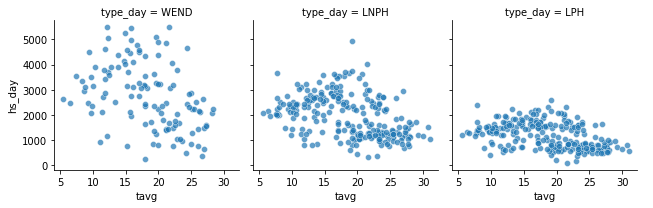

In [8]:
# hours bike ride per day VS avg.temp.
g = sns.FacetGrid(br_data, col="type_day")
g.map(sns.scatterplot, "tavg", "hs_day", alpha=.7)
g.add_legend()

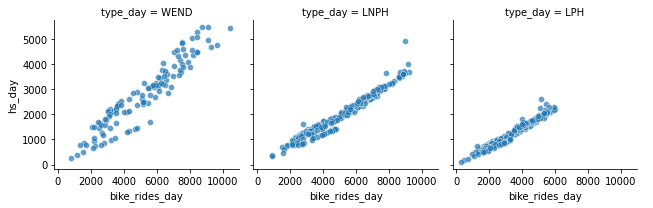

In [9]:
# bike rides per day (count) VS avg.temp.
g = sns.FacetGrid(br_data, col="type_day")
g.map(sns.scatterplot, "bike_rides_day", "hs_day", alpha=.7)
g.add_legend()

([<matplotlib.axis.XTick at 0x7fe55af1bfd0>,
 <a list of 27 Text major ticklabel objects>)

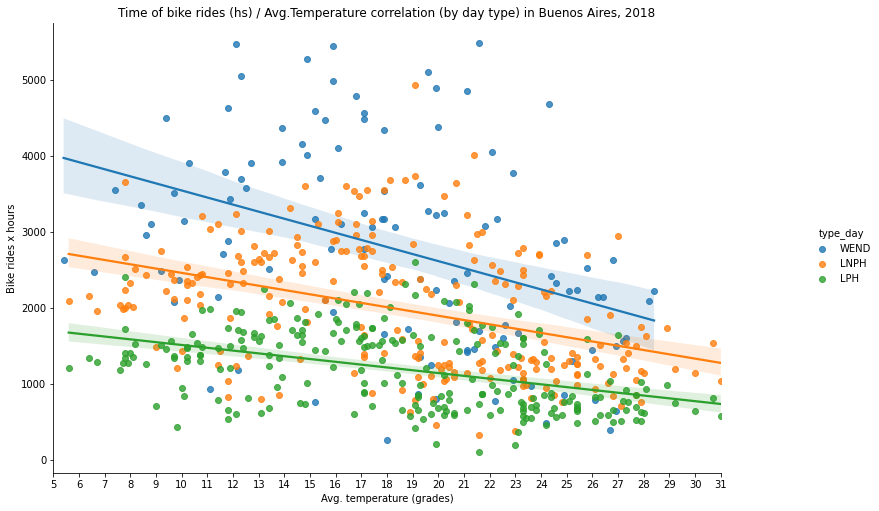

In [ ]:
g = sns.lmplot(x="tavg", y="hs_day", hue="type_day", data=br_data)
g = (g.set_axis_labels("Avg. temperature (grades)", "Bike rides x hours"))
fig = plt.gcf()
ax = plt.gca()
ax.set_title("Time of bike rides (hs) / Avg.Temperature correlation (by day type) in Buenos Aires, 2018")
fig.set_size_inches(13, 7)
plt.xticks(range(5, 32))

In [ ]:
# X only with 1 feature
X = df_LPH[['tavg']]
y = df_LPH['hs_day']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train.count()

tavg    183
dtype: int64

In [ ]:
# create linear regression model, fit and predict 

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
print(y_pred)

[1421.52988911 1142.56992171  915.26920753 1111.57436978 1311.32348224
 1218.33682644 1362.98273546 1187.34127451 1228.66867708  987.59216204
  963.48451054 1380.20248654 1397.42223761 1349.2069346   904.93735689
  898.04945646 1094.3546187  1393.9782874   935.93290882 1132.23807107
 1149.45782214 1056.47116634  973.81636118 1387.09038697 1214.89287622
 1521.40444534 1001.3679629  1342.31903417 1032.36351484 1452.52544105
 1266.55212945 1035.80746505 1001.3679629   863.60995431 1135.68202128
 1090.91066849 1214.89287622 1152.90177236 1177.00942386 1256.2202788
 1435.30568997 1211.44892601  842.94625302 1001.3679629   873.94180495
  736.18379636 1214.89287622 1469.74519212 1304.43558181 1115.01831999
 1435.30568997 1146.01387193 1352.65088482 1249.33237837 1294.10373117
 1297.54768138 1108.13041956 1063.35906677 1225.22472687  929.04500839
  929.04500839  929.04500839]


In [ ]:
model_r2_score = regressor.score(X_test, y_test)
print(f'R-squared: {model_r2_score}' )

R-squared: 0.19552131529170358


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regressor, X, y, cv=6)
print(f'CV scores list: {cv_scores}')
print(f'Mean R-squared with 6 CV scores: {np.mean(cv_scores)}' )

CV scores list: [-8.95187249 -0.71470552 -0.19631474 -0.31294776 -4.40273386  0.02097643]
Mean R-squared with 6 CV scores: -2.4262663217939244


In [ ]:
# X with 2 features
X2 = df_LPH[['bike_rides_day','tavg']]
y2 = df_LPH['hs_day']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)

In [ ]:
# create linear regression model for 2 features in X, fit and predict 

regressor2 = LinearRegression()
regressor2.fit(X2_train, y2_train)
y2_pred = regressor2.predict(X2_test)

In [ ]:
model_r2_score = regressor2.score(X2_test, y2_test)
print(f'R-squared: {model_r2_score}' )

R-squared: 0.9597724505319959


In [ ]:
cv_scores = cross_val_score(regressor2, X2, y2, cv=6)
print(f'CV scores list: {cv_scores}')
print(f'Mean R-squared with 6 CV scores: {np.mean(cv_scores)}' )

CV scores list: [0.40073867 0.95355093 0.92916654 0.97397186 0.83496845 0.83116272]
Mean R-squared with 6 CV scores: 0.8205931950492525


In [ ]:
coef = regressor2.coef_
intercept = regressor2.intercept_
print(f'Intercept: {intercept} - Slope: {coef}')

Intercept: -149.06483526276838 - Slope: [0.38677462 5.96006047]


In [ ]:
# scale X values with MinMax
scaler = preprocessing.MinMaxScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.fit_transform(X2_test)

In [ ]:
# Ridge regression, add regularization with alpha value (default 10)
from sklearn.linear_model import Ridge
ridge_regressor = Ridge(alpha=20.0).fit(X2_train, y2_train)
print(f'R-squared: {ridge_regressor.score(X2_test, y2_test)}' )

R-squared: 0.9597612729666329


Create a dataframe with test and predicted values from regression model

Then show in a 3d scatter graph

In [ ]:
# join in a df the X,y test values
df_test = X2_test.join(y2_test)
df_test['data_type'] = 'Test'
df_test.reset_index(drop=True, inplace=True)
df_test

,bike_rides_day,tavg,hs_day,data_type
0,2241,19.8,741.320833,Test
1,2590,13.7,948.756389,Test
2,5628,21.4,2314.441667,Test
3,5428,20.7,2074.882222,Test
4,4758,11.8,1732.136667,Test
...,...,...,...,...
57,1942,20.2,586.918333,Test
58,2717,10.0,935.998889,Test
59,4575,21.7,1774.550000,Test
60,3357,24.2,1252.278889,Test


In [ ]:
# transform np.ndarray (y_pred) to a pandas.series and put a name (hs_day value)
y2_pred_series = pd.Series(y2_pred)
y2_pred_series.name='hs_day'

In [ ]:
# join in a df the X test values with y predictions
df_pred = X2_test.join(y2_pred_series)
df_pred['data_type'] = 'Pred'
df_pred.reset_index(drop=True, inplace=True)
df_pred

,bike_rides_day,tavg,hs_day,data_type
0,2241,19.8,835.706284,Pred
1,2590,13.7,934.334257,Pred
2,5628,21.4,2155.248017,Pred
3,5428,20.7,2073.721051,Pred
4,4758,11.8,1761.537517,Pred
...,...,...,...,...
57,1942,20.2,722.444697,Pred
58,2717,10.0,961.402410,Pred
59,4575,21.7,1749.762361,Pred
60,3357,24.2,1293.571025,Pred


In [ ]:
# concatenate both df (df_test + df_pred)
df_test_pred = pd.concat([df_test, df_pred])

In [ ]:
# Build 3d graph with df_test_pred data
import plotly.express as px
fig = px.scatter_3d(df_test_pred,
                    x="bike_rides_day",
                    y="tavg", 
                    z="hs_day",
                    color='data_type', 
                    symbol='data_type',                                            
                    )

fig.update_layout(margin=dict(l=0, r=20, b=20, t=0))
fig.show()